In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from typing import Any, List, Dict, Tuple
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict

from sklearn.model_selection import train_test_split

%matplotlib inline


In [2]:
df = pd.read_csv('/kaggle/input/folder-df/heart.csv')

# Divide into features and target
X = df.drop('output', axis=1)
y = df['output']

# Attribute Information:

<h5>age</h5>
<h5>sex</h5>
<h5>chest pain type (4 values)</h5>
<h5>resting blood pressure</h5>
<h5>serum cholestoral in mg/dl</h5>
<h5>fasting blood sugar > 120 mg/dl</h5>
<h5>resting electrocardiographic results (values 0,1,2)</h5>
<h5>maximum heart rate achieved</h5>
<h5>exercise induced angina</h5>
<h5>oldpeak = ST depression induced by exercise relative to rest</h5>
<h5>the slope of the peak exercise ST segment</h5>
<h5>number of major vessels (0-3) colored by flourosopy</h1>
<h5>thal2 3 = normal; 6 = 3ixed defect; 7 = reversable defect</h5> defect</span>le defect</h5>

# Analyse statistics of the given features
## to understand which group divides for each feature are better 

In [4]:
# Identify the types of features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slp', 'caa', 'thall']
binary_features = ['sex', 'fbs', 'exng']  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

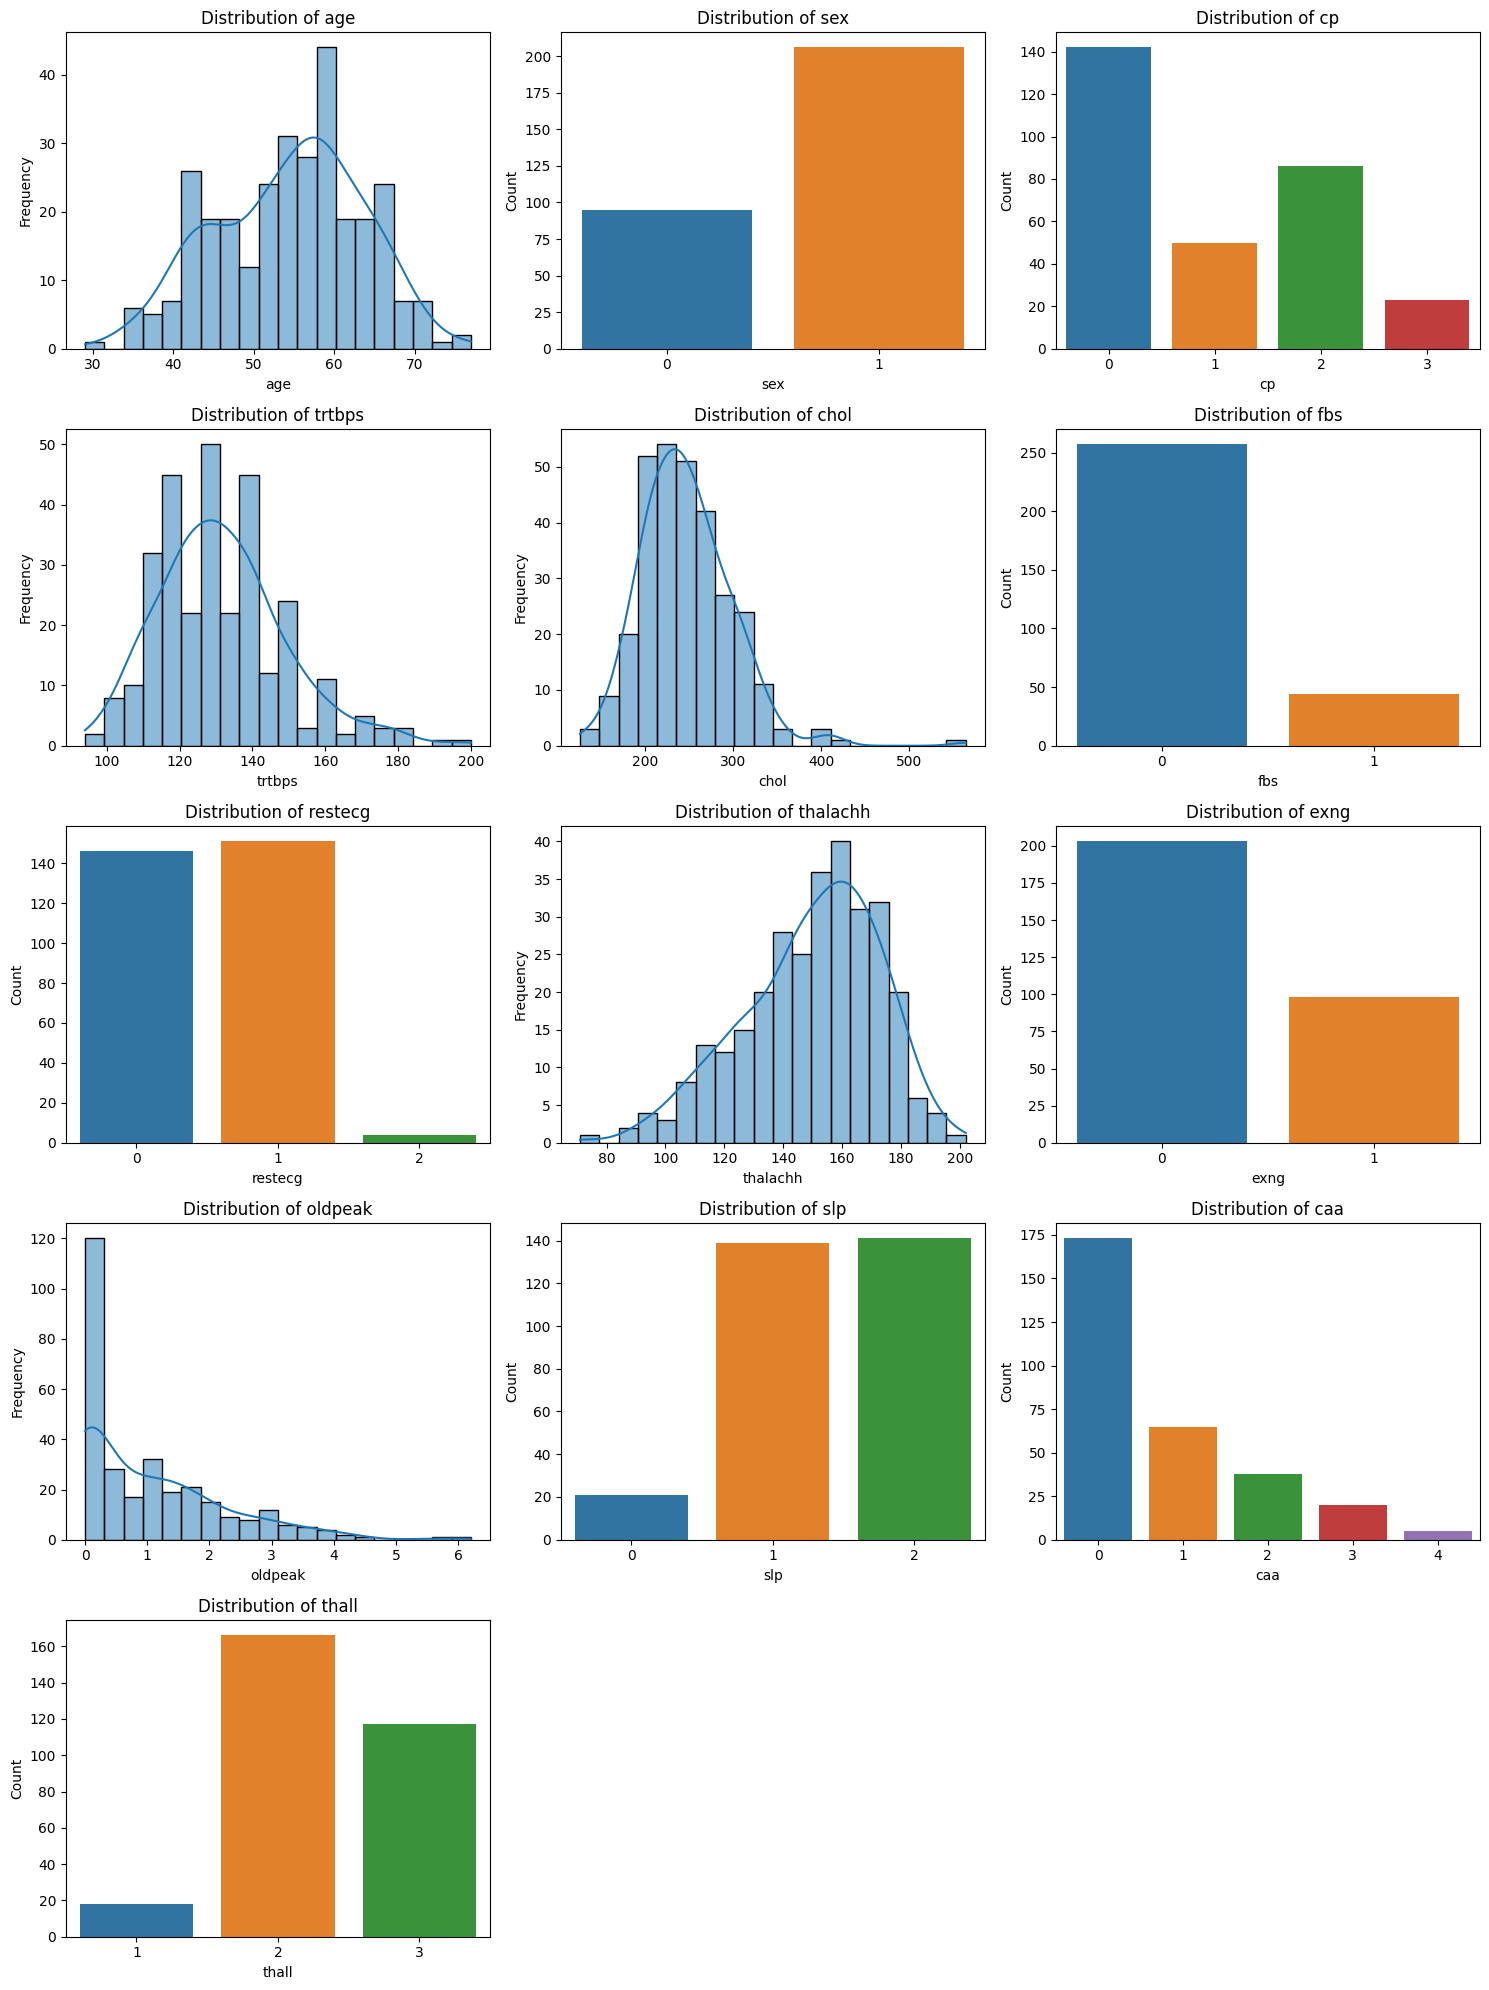

count    301.000000
mean      54.378738
std        9.110950
min       29.000000
25%       47.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
count    301.000000
mean       0.684385
std        0.465534
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64
count    301.000000
mean       0.966777
std        1.032259
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64
count    301.000000
mean     131.647841
std       17.594002
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64
count    301.000000
mean     246.504983
std       51.915998
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64
count    301.000000
mean       0.146179
std        0.353874
min    

In [5]:
# Plot distributions of features
num_columns = len(X.columns)
cols = 3
rows = math.ceil(num_columns / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    ax = axes[i]
    if X[column].dtype == 'object' or len(X[column].unique()) < 10:
        sns.countplot(x=X[column], ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    else:
        sns.histplot(x=X[column], bins=20, kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


for feature in X:
    print(X[feature].describe())

In [6]:
# Examine value counts of target y
print("Target value counts:")
print(y.value_counts())

Target value counts:
output
1    164
0    137
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

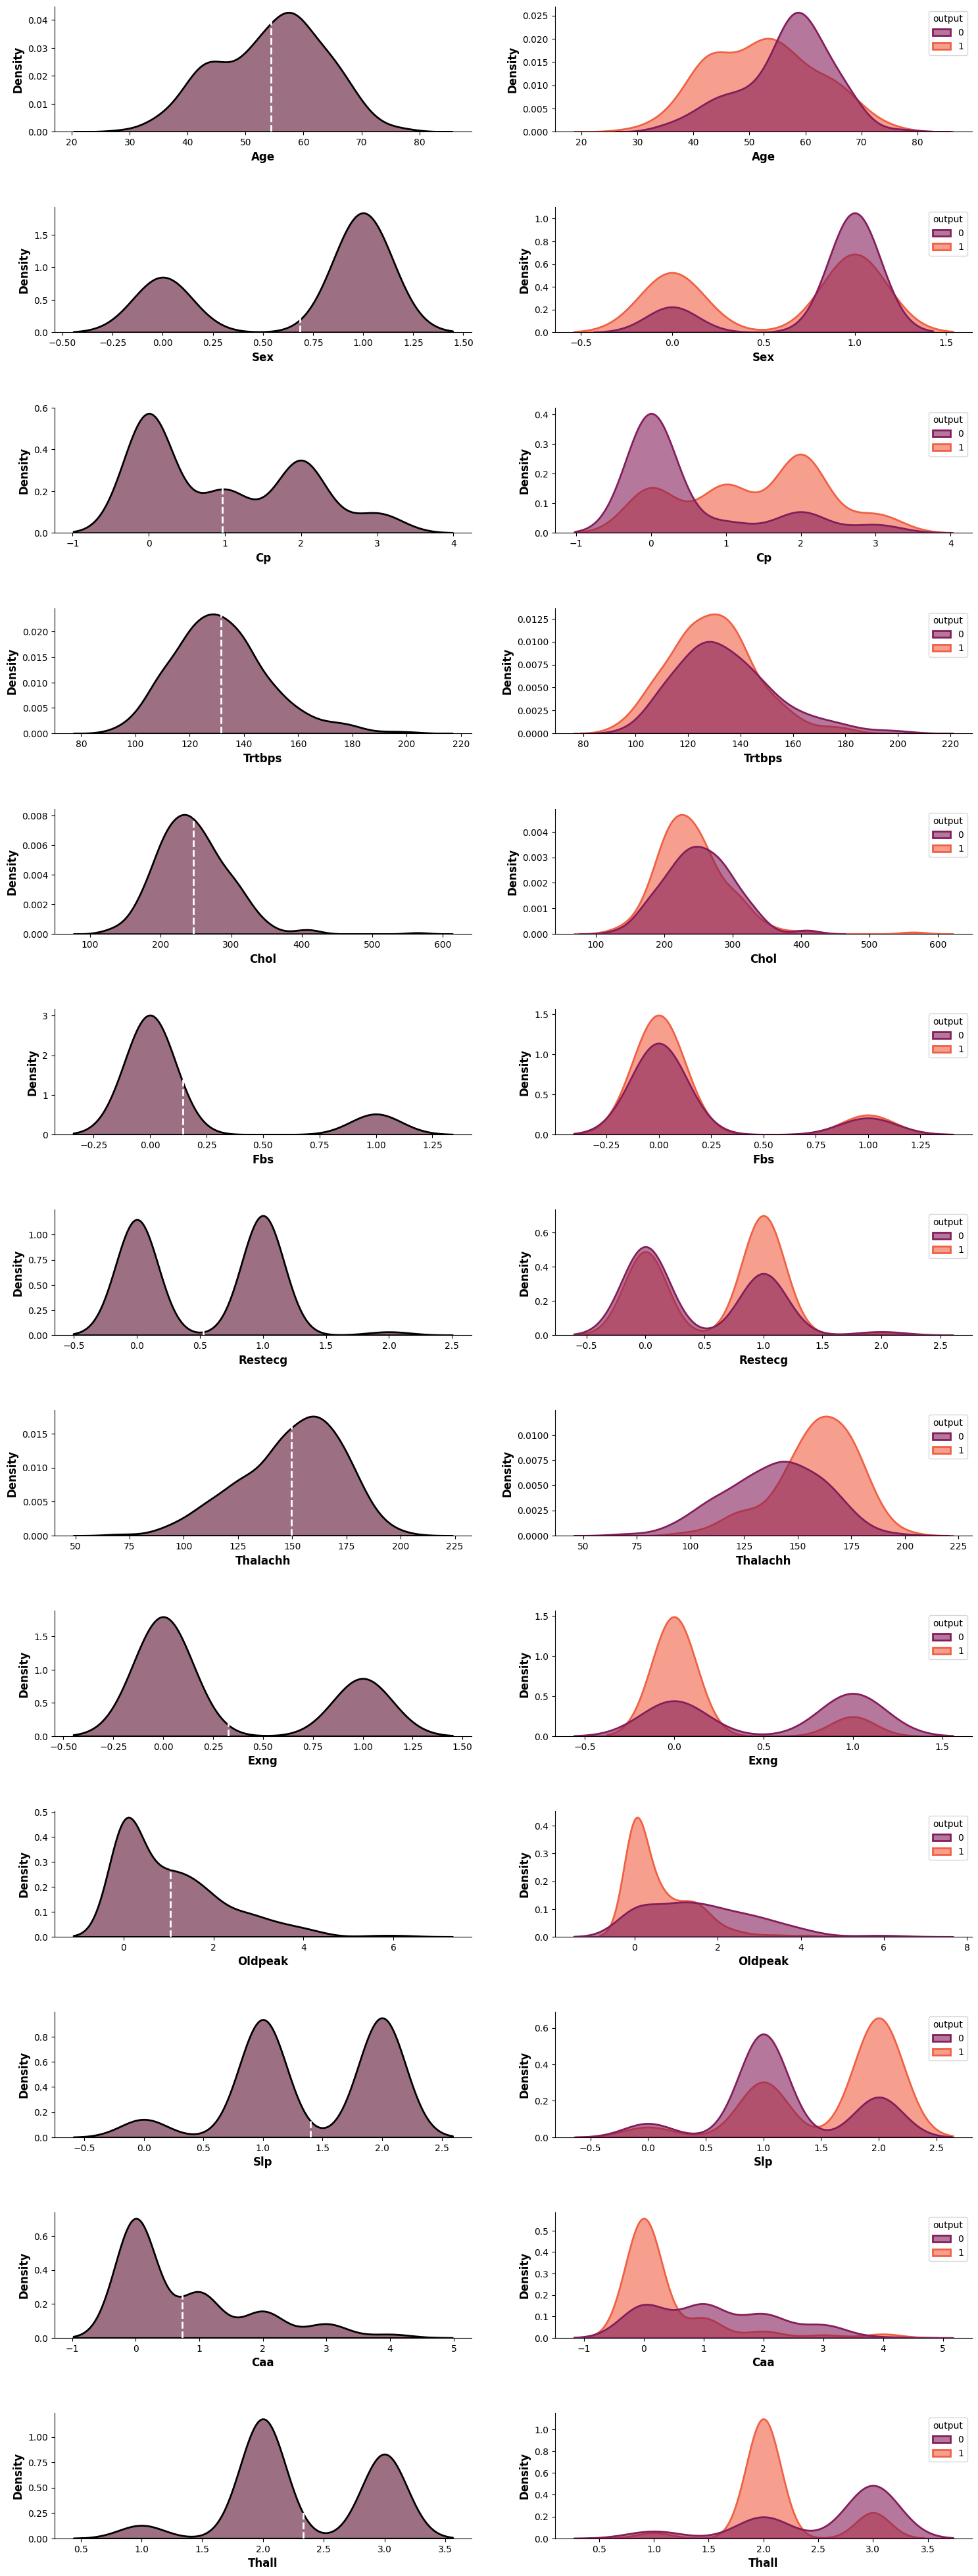

In [7]:
# Plot KDE plots of features
plotIndex = 1
plt.figure(figsize=(18, 50))
for i in range(1, len(X.columns)+1):
    plt.subplot(len(X.columns), 2, plotIndex)
    sns.kdeplot(data=X, x=X.columns[i-1], fill=True, linewidth=2, color='#5c1031', alpha=0.6, edgecolor='k')
    plt.axvline(X[X.columns[i-1]].mean(), color='white', linestyle='--', linewidth=2)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel('Density', fontsize=12, weight='bold')
    sns.despine()

    plt.subplot(len(X.columns), 2, plotIndex+1)
    sns.kdeplot(data=X, x=X.columns[i-1], fill=True, hue=y, linewidth=2, palette='rocket', alpha=0.6)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel('Density', fontsize=12, weight='bold')
    sns.despine()

    plotIndex += 2
plt.subplots_adjust(hspace=0.6)
plt.show()

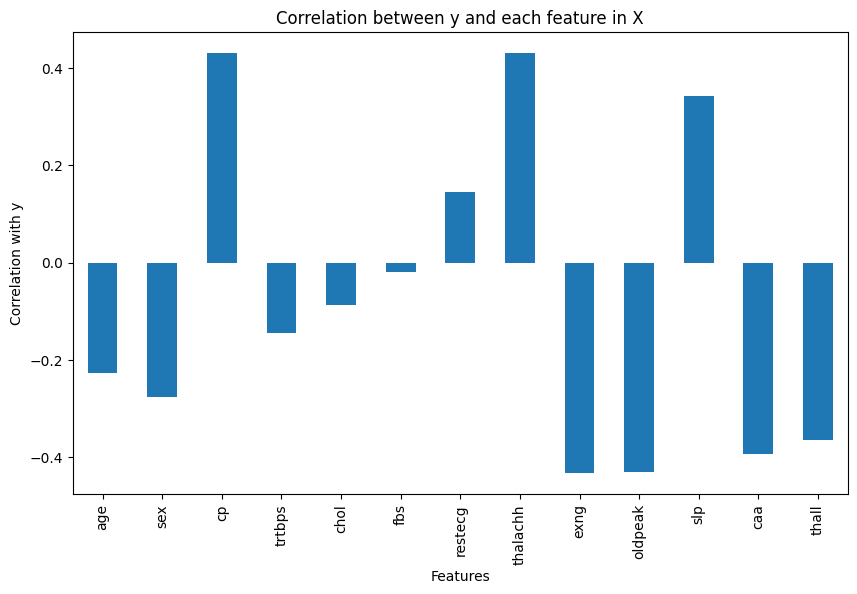

In [8]:
# Calculate correlations between X and y
correlations = X.apply(lambda col: col.corr(y))
correlations.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between y and each feature in X')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.show()

# Data Preprocessing

In [9]:
# Check for duplicates
print("Number of duplicated rows:", X.duplicated().sum())

# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())

Number of duplicated rows: 1
Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64


# Split the data

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Scaling (binarization) of the features

### Binarize age feature into male and female:

In [11]:
# 1. Binarize 'sex' into 'is_male' and 'is_female'
X['is_male'] = X['sex'].apply(lambda x: 1 if x == 1 else 0)
X['is_female'] = X['sex'].apply(lambda x: 1 if x == 0 else 0)

### Binarize age feature into  groups: >=29, >=40, >=50, >=60, >=70

In [12]:
# 2. Convert 'age' into multiple binary features
age_thresholds = [29, 40, 50, 60, 70]
for threshold in age_thresholds:
    X[f'age_ge_{threshold}'] = X['age'].apply(lambda x: 1 if x >= threshold else 0)

### Binarize cp = Chest Pain type 

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomaticmatic

In [13]:
# 3. Convert 'cp' into four binary features
cp_mapping = {
    1: 'typical_angina',
    2: 'atypical_angina',
    3: 'non_anginal_pain',
    4: 'asymptomatic'
}
for value, name in cp_mapping.items():
    X[f'cp_{value}'] = X['cp'].apply(lambda x: 1 if x == value else 0)

### Binarize cholestoral in mg/dl into groups: 
- >=126, >=180,>= 200,>= 211, >=220, >=240, >=255, >=274,>= 300,>= 350, >=400,>= 450,>= 500

In [14]:
# 4. Convert 'chol' into multiple binary features
chol_thresholds = [126, 180, 200, 211, 220, 240, 255, 274, 300, 350, 400, 450, 500]
for threshold in chol_thresholds:
    X[f'chol_ge_{threshold}'] = X['chol'].apply(lambda x: 1 if x >= threshold else 0)

### Binarize fasting blood sugar (1 = true; 0 = false) into 2 categories:
- **fbs_high** - fasting blood sugar > 120 mg/dl 
- **fbs_not_high** - fasting blood sugar <= 120 mg/dl  



In [15]:
# 5. Convert 'fbs' into a binary feature
# Convert 'fbs' into two binary columns
X['fbs_high'] = X['fbs'].apply(lambda x: 1 if x == 1 else 0)
X['fbs_not_high'] = X['fbs'].apply(lambda x: 1 if x == 0 else 0)


### Binarize trtbps, resting blood pressure (in mm Hg),  into groups: 
-   >=100, >=120, >=130, >=140, >=160, >=180

In [16]:
# 6. Convert 'trtbps' into multiple binary features
trtbps_thresholds = [100, 120, 130, 140, 160, 180]
for threshold in trtbps_thresholds:
    X[f'trtbps_ge_{threshold}'] = X['trtbps'].apply(lambda x: 1 if x >= threshold else 0)

### Binarize rest_ecg, resting electrocardiographic results:

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


In [17]:
# 7. Convert 'restecg' into binary features
restecg_mapping = {
    0: 'restecg_normal',
    1: 'restecg_st_t_abnormal',
    2: 'restecg_lv_hypertrophy'
}
for value, name in restecg_mapping.items():
    X[name] = X['restecg'].apply(lambda x: 1 if x == value else 0)

### Binarize thalachh, maximum heart rate achieved:

- >=71, >=100, >=120, >=140, >=160, >=180:

In [18]:
# 8.Binarize thalachh into categories >=71, >=100, >=120, >=140, >=160, >=180:
thresholds = [71, 100, 120, 140, 160, 180]
for thresh in thresholds:
    X[f'thalachh_ge_{thresh}'] = (X['thalachh'] >= thresh).astype(int)

### Binarize exng ,exercise induced angina:
- 1 = yes;
- 0 = no;


In [19]:
#9. Binarize exng into exng_yes and exng_no:
X['exng_yes'] = (X['exng'] == 1).astype(int)
X['exng_no'] = (X['exng'] == 0).astype(int)

### Binarize oldpeak, ST depression induced by exercise relative to rest :
- >=0.0, >=0.8, >=1.6, >=2.4, >=3.5,>=5.0

In [20]:
#10. Binarize oldpeak into >=0.0, >=0.8, >=1.6, >=2.4, >=3.5,>=5.0:
thresholds_oldpeak = [0.0, 0.8, 1.6, 2.4, 3.5, 5.0]
for thresh in thresholds_oldpeak:
    X[f'oldpeak_ge_{thresh}'] = (X['oldpeak'] >= thresh).astype(int)

### Binarize slp, the slope of the peak exercise ST segment :
- type 0,
- type 1,
- type 2

In [21]:
#11. Binarize slp into slp0, slp1, slp2:
X['slp0'] = (X['slp'] == 0).astype(int)
X['slp1'] = (X['slp'] == 1).astype(int)
X['slp2'] = (X['slp'] == 2).astype(int)

### Binarize caa, number of major vessels (0-4) colored by flourosopy :
-  0,
-  1,
-  2,
-  3,
-  4

In [22]:
#12.  Binarize caa into caa0, caa1, caa2, caa3, caa4:
X['caa0'] = (X['caa'] == 0).astype(int)
X['caa1'] = (X['caa'] == 1).astype(int)
X['caa2'] = (X['caa'] == 2).astype(int)
X['caa3'] = (X['caa'] == 3).astype(int)
X['caa4'] = (X['caa'] == 4).astype(int)

### Binarize thall into thall1, thall2, thall3

In [23]:
# 13. Binarize thall into thall1, thall2, thall3:
X['thall1'] = (X['thall'] == 1).astype(int)
X['thall2'] = (X['thall'] == 2).astype(int)
X['thall3'] = (X['thall'] == 3).astype(int)

In [24]:
#  Save the transformed dataset
X.to_csv('heart_dataset_binarized.csv', index=False)

# Delete original columns
columns_to_remove = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = X.drop(columns=columns_to_remove)

In [25]:
X= X.astype(bool)
X

,is_male,is_female,age_ge_29,age_ge_40,age_ge_50,age_ge_60,age_ge_70,cp_1,cp_2,cp_3,...,slp1,slp2,caa0,caa1,caa2,caa3,caa4,thall1,thall2,thall3
0,True,False,True,True,True,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,True,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,False,True,True,True,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
3,True,False,True,True,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
4,False,True,True,True,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,True,True,True,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
297,True,False,True,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,True
298,True,False,True,True,True,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
299,True,False,True,True,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


 # Binarization is Complete, Re-split:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  Lazy FCA baseline:

In [27]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(intersection):
            # Find samples in X_train_positive that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(intersection):
            # Find samples in X_train_negative that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            intersection = sample & pos_sample
            if is_positive_classifier(intersection):
                positive_classifiers += 1

        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            intersection = sample & neg_sample
            if is_negative_classifier(intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
           # print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            #print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            #print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # List to store predictions for each test sample
        predictions = []
        
        # Iterate through each sample in X_test
        for _, sample in X_test.iterrows():
            # Classify the sample and append the result to predictions
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        
        return predictions

In [28]:
pos_X_train = X_train[y_train == 1]
neg_X_train = X_train[y_train == 0]
len(pos_X_train), len(neg_X_train)

(131, 109)

In [29]:
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [33]:
class LazyClassifierFCA2:
    def __init__(self,
                 max_negative_allowed_for_positive,
                 min_positive_support,
                 min_cardinality,
                 max_positive_allowed_for_negative,
                 min_negative_support):
        self.X_train = None
        self.y_train = None
        self.max_negative_allowed_for_positive = max_negative_allowed_for_positive
        self.min_positive_support = min_positive_support
        self.min_cardinality = min_cardinality
        self.max_positive_allowed_for_negative = max_positive_allowed_for_negative
        self.min_negative_support = min_negative_support

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train.astype(bool)
        self.y_train = y_train
        self.X_train_positive = self.X_train[self.y_train == 1]
        self.X_train_negative = self.X_train[self.y_train == 0]

    def count_class_support(self, intersection: pd.Series) -> (int, int):
        # Check how many positive and negative samples contain the intersection
        pos_mask = (self.X_train_positive & intersection) == intersection
        neg_mask = (self.X_train_negative & intersection) == intersection
        num_positives = pos_mask.all(axis=1).sum()
        num_negatives = neg_mask.all(axis=1).sum()
        return num_positives, num_negatives

    def classify_sample(self, sample: pd.Series) -> Any:
        sample = sample.astype(bool)

        # Scores for final decision
        positive_score = 0
        negative_score = 0

        # Check intersections with positive class objects
        for _, pos_sample in self.X_train_positive.iterrows():
            intersection = sample & pos_sample
            card = intersection.sum()
            if card < self.min_cardinality:
                continue
            num_pos, num_neg = self.count_class_support(intersection)
            # This intersection suggests positive if it is supported by enough positives and not too many negatives
            if num_pos >= self.min_positive_support and num_neg <= self.max_negative_allowed_for_positive:
                positive_score += 1

        # Check intersections with negative class objects
        for _, neg_sample in self.X_train_negative.iterrows():
            intersection = sample & neg_sample
            card = intersection.sum()
            if card < self.min_cardinality:
                continue
            num_pos, num_neg = self.count_class_support(intersection)
            # This intersection suggests negative if it is supported by enough negatives and not too many positives
            if num_neg >= self.min_negative_support and num_pos <= self.max_positive_allowed_for_negative:
                negative_score += 1

        total = positive_score + negative_score
        if total > 0:
            pos_fr = positive_score/total
            neg_fr = negative_score/total
        else:
            pos_fr = 0
            neg_fr = 0
            
            # Decide the class 
        if pos_fr > neg_fr:
           # print(f"sample {sample.name} is classified as 1, {positive_score=}, {negative_score=}")
            return 1
        elif neg_fr > pos_fr:
           # print(f"sample {sample.name} is classified as 0, {positive_score=}, {negative_score=}")
            return 0
        else:
            return 1


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        predictions = []
        for _, sample in X_test.iterrows():
            pred = self.classify_sample(sample)
            predictions.append(pred)
        return predictions


In [34]:
classifier2 = LazyClassifierFCA2(0,0,2,0,0)
classifier2.fit(X_train, y_train)

y_pred2_0 = classifier2.predict(X_test)


classifier2 = LazyClassifierFCA2(0,4,2,0,4)
classifier2.fit(X_train, y_train)

y_pred2_1 = classifier2.predict(X_test)

classifier2 = LazyClassifierFCA2(0,10,2,0,10)
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)

In [53]:
classifier2 = LazyClassifierFCA2(0,0,10,0,0)
classifier2.fit(X_train, y_train)

y_pred2_00 = classifier2.predict(X_test)

In [ ]:
# from typing import List, Any, Tuple
# from collections import defaultdict


# class LazyFCA3:
#     def __init__(self, 
#                  min_support: float = 1.0,   
#                  min_cardinality: int = 2,
#                  confidence_threshold: float = 0.6):
#         self.X_train = None
#         self.y_train = None
#         self.min_support = min_support
#         self.min_cardinality = min_cardinality
#         self.confidence_threshold = confidence_threshold
#         self.feature_weights = None
#         self.pattern_cache = {}
        
#     def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
#         self.X_train = X_train.astype(bool)
#         self.y_train = y_train
#         self.feature_weights = self._calculate_feature_weights()
        
#         # Pre-calculate class sizes for adaptive support checking
#         self.num_positive = (self.y_train == 1).sum()
#         self.num_negative = (self.y_train == 0).sum()
        
#     def _calculate_feature_weights(self) -> pd.Series:
#         # use a normalized measure:
#         # weight = (|pos_freq - neg_freq|) * (pos_freq+neg_freq)
#         # This is a simplistic heuristic; in practice consider mutual information or gini.
#         weights = {}
#         for column in self.X_train.columns:
#             pos_freq = (self.X_train[column] & (self.y_train == 1)).mean()
#             neg_freq = (self.X_train[column] & (self.y_train == 0)).mean()
#             # Simple heuristic: emphasize differences that are both large and common
#             w = abs(pos_freq - neg_freq) * (pos_freq + neg_freq)
#             weights[column] = w
#         return pd.Series(weights)
    
#     def _calculate_pattern_confidence(self, intersection: pd.Series, class_samples: pd.DataFrame, class_label: int) -> Tuple[float, int]:
#         # class_label: 1 for positive, 0 for negative
#         pattern_key = tuple(intersection[intersection].index)
#         if pattern_key in self.pattern_cache:
#             return self.pattern_cache[pattern_key]

#         # Support: how many class samples contain this intersection
#         class_support = ((class_samples & intersection) == intersection).all(axis=1).sum()
        
#         # Total matches: how many samples in the entire training set contain this intersection
#         total_matches = ((self.X_train & intersection) == intersection).all(axis=1).sum()
        
#         confidence = (class_support / total_matches) if total_matches > 0 else 0.0
#         # Weighted confidence
#         feature_sum = self.feature_weights[intersection].sum()
#         weighted_confidence = confidence * feature_sum
#         # weighted_confidence = confidence 
        
#         # Cache the result
#         self.pattern_cache[pattern_key] = (weighted_confidence, class_support)
#         return weighted_confidence, class_support
    
#     def _evaluate_pattern(self, intersection: pd.Series, positive: bool) -> float:
#         # Determine class samples
#         class_label = 1 if positive else 0
#         X_class = self.X_train[self.y_train == class_label]

#         weighted_confidence, support = self._calculate_pattern_confidence(intersection, X_class, class_label)
        
#         # Check minimum support as fraction of class size
#         class_size = self.num_positive if positive else self.num_negative
#         required_support = self.min_support if self.min_support >= 1 else int(np.ceil(self.min_support * class_size))
#         required_support = max(required_support, 1)  # at least 1
        
#         if support < self.min_support:
#             return 0.0
        
#         cardinality = intersection.sum()
#         if cardinality < self.min_cardinality:
#             return 0.0
        
#         # (scale weighted_confidence by intersection size)
#         # Larger intersections may be more specific and more reliable
#         score = weighted_confidence * (cardinality / len(self.X_train.columns))

        
#         return score
    
#     def classify_sample(self, sample: pd.Series) -> Tuple[int, float]:
#         sample = sample.astype(bool)
#         X_train_positive = self.X_train[self.y_train == 1]
#         X_train_negative = self.X_train[self.y_train == 0]
        
#         positive_score = 0.0
#         negative_score = 0.0
        
#         # Evaluate positive patterns
#         for _, pos_sample in X_train_positive.iterrows():
#             intersection = sample & pos_sample
#             positive_score += self._evaluate_pattern(intersection, True)
            
#         # Evaluate negative patterns
#         for _, neg_sample in X_train_negative.iterrows():
#             intersection = sample & neg_sample
#             negative_score += self._evaluate_pattern(intersection, False)
            
#         total_score = positive_score + negative_score
#         if total_score > 0:
#             confidence = positive_score / total_score
#         else:
#             confidence = 0.5
        
#         # Make prediction with confidence threshold
#         prediction = 1 if confidence > self.confidence_threshold else 0
#         # prediction = 1 if positive_score > negative_score else 0
        
#         return prediction, confidence
        
#     def predict(self, X_test: pd.DataFrame) -> List[int]:
#         predictions = []
#         confidences = []
        
#         for _, sample in X_test.iterrows():
#             prediction, confidence = self.classify_sample(sample)
#             predictions.append(prediction)
#             confidences.append(confidence)
            
#         self.last_confidences = confidences
#         return predictions
        
#     def predict_proba(self, X_test: pd.DataFrame) -> List[Tuple[float, float]]:
#         predictions = []
#         for _, sample in X_test.iterrows():
#             _, confidence = self.classify_sample(sample)
#             # Probability: (P(y=0), P(y=1)) = (1 - confidence, confidence)
#             predictions.append((1 - confidence, confidence))
#         return predictions


In [35]:
from itertools import combinations
from typing import List, Tuple


class LazyFCAclf3:
    def __init__(self, max_pattern_size, score_threshold):
        """
        max_pattern_size: Maximum size of attribute subsets to consider 
        score_threshold: Minimum absolute score required to keep a pattern
        """
        self.max_pattern_size = max_pattern_size
        self.score_threshold = score_threshold
        
        self.X_train = None
        self.y_train = None
        self.pattern_scores = None
        self.binary_mapping = {}

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        """      
        Steps:
        1. Generate attribute sets (patterns) of size 1 up to max_pattern_size.
        2. Compute discriminative scores for each pattern: score = P(pattern|+) - P(pattern|-).
        3. Keep only patterns with score above a threshold.
        """

        values = sorted(y.unique())
        self.binary_mapping[False] = values[0]
        self.binary_mapping[True] = values[1]
        y_bool = (y == values[1]).astype(bool)
        
        self.X_train = X.copy()
        self.y_train = y_bool
        
        # Separate positive and negative subsets
        X_pos = self.X_train[self.y_train]
        X_neg = self.X_train[~self.y_train]
        
        # Generate patterns (attribute sets)
        attributes = list(self.X_train.columns)
        all_patterns = []
        
        # Generate all subsets of attributes from size 1 to max_pattern_size
        # for size in range(1, self.max_pattern_size + 1):
        #     for combo in combinations(attributes, size):
        #         all_patterns.append(combo)

        for combo in combinations(attributes, self.max_pattern_size):
            all_patterns.append(combo)
        
        # Compute scores for each pattern
        # score(pattern) = P(pattern|+) - P(pattern|-)
        # P(pattern|+) = number of positive samples that have this pattern / total positives
        # similarly for P(pattern|-)
        
        total_pos = X_pos.shape[0]
        total_neg = X_neg.shape[0]
        
        pattern_scores = {}
        for pattern in all_patterns:
            # pattern is a tuple of attribute names, all must be 1 for pattern to hold
            # Count positives that match
            pos_matches = (X_pos[list(pattern)].sum(axis=1) == len(pattern)).sum()
            p_pos = pos_matches / total_pos
            
            neg_matches = (X_neg[list(pattern)].sum(axis=1) == len(pattern)).sum()
            p_neg = neg_matches / total_neg
  
            score = p_pos - p_neg

            #patterns which are strongly indicative of either class (either + or -) are retained
            if abs(score) >= self.score_threshold:
                pattern_scores[pattern] = score

        
        self.pattern_scores = pattern_scores

    def predict(self, X_test: pd.DataFrame) -> List:
        """
        Steps:
        1. For each test sample identify which patterns are present.
        2. Sum up the pattern scores.
        3. If sum > 0, predict positive; if sum < 0, predict negative; if zero, a tie.      
        """
        predictions = []
        
        for _, sample in X_test.iterrows():
            sample_values = sample.values
            
            # Compute score sum for this sample
            total_score = 0.0
            for pattern, score in self.pattern_scores.items():
                # Check if sample contains this pattern
                # i.e. all attributes in 'pattern' are 1 in the sample
                if all(sample[attr] == 1 for attr in pattern):
                    total_score += score
            
            if total_score > 0:
                prediction = True
            elif total_score < 0:
                prediction = False
            else:
                # a Tie: If scores sum to 0, default to majority class or random
                prediction = True
            
            predictions.append(self.binary_mapping[prediction])
        
        return predictions

In [37]:
classifier3 = LazyFCAclf3(2,0)
classifier3.fit(X_train, y_train)

y_pred3_0 = classifier3.predict(X_test)

classifier3 = LazyFCAclf3(3,0)
classifier3.fit(X_train, y_train)

y_pred3_1 = classifier3.predict(X_test)

# classifier3 = LazyFCAclf3(4,0)
# classifier3.fit(X_train, y_train)

# y_pred3_3 = classifier3.predict(X_test)

In [43]:
def classification_scores(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    TNR = TN / (TN + FP) if (TN + FP) > 0 else np.nan
    NPV = TN / (TN + FN) if (TN + FN) > 0 else np.nan
    FPR = FP / (FP + TN) if (FP + TN) > 0 else np.nan
    FDR = FP / (TP + FP) if (TP + FP) > 0 else np.nan
    Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP+TN+FP+FN)>0 else np.nan
    Precision = TP / (TP + FP) if (TP + FP) > 0 else np.nan
    Recall = TP / (TP + FN) if (TP + FN) > 0 else np.nan
    F1 = 2*Precision*Recall/(Precision+Recall) if (Precision+Recall)>0 else np.nan

    return {
        'True Positive': TP,
        'True Negative': TN,
        'False Positive': FP,
        'False Negative': FN,
        'True Negative Rate (Specificity)': TNR,
        'Negative Predictive Value': NPV,
        'False Positive Rate': FPR,
        'False Discovery Rate': FDR,
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall (True Positive Rate)': Recall,
        'F1 Score': F1
    }

In [54]:
y_test_np = y_test.to_numpy()
y_pred_np = np.array(y_pred)
y_pred2_np = np.array(y_pred2)
y_pred2_0_np = np.array(y_pred2_0)
y_pred2_00_np = np.array(y_pred2_00)
y_pred2_1_np = np.array(y_pred2_1)
y_pred3_0_np = np.array(y_pred3_0)
y_pred3_1_np = np.array(y_pred3_1)
# y_pred3_3_np = np.array(y_pred3_3)


In [55]:
results = pd.DataFrame({
    'Model 1': classification_scores(y_test_np, y_pred_np),
    'Model 2': classification_scores(y_test_np, y_pred2_np),
    'Model 2_0': classification_scores(y_test_np, y_pred2_0_np),
    'Model 2_00': classification_scores(y_test_np, y_pred2_00_np),
    'Model 2_1': classification_scores(y_test_np, y_pred2_1_np),
    'Model 3_0': classification_scores(y_test_np, y_pred3_0_np),
    'Model 3_1': classification_scores(y_test_np, y_pred3_1_np),
    # 'Model 3_3': classification_scores(y_test_np, y_pred3_3_np),
}).T

print(results)

            True Positive  True Negative  False Positive  False Negative  \
Model 1              29.0           21.0             7.0             4.0   
Model 2              27.0           19.0             9.0             6.0   
Model 2_0            28.0           22.0             6.0             5.0   
Model 2_00           28.0           22.0             6.0             5.0   
Model 2_1            28.0           21.0             7.0             5.0   
Model 3_0            27.0           24.0             4.0             6.0   
Model 3_1            27.0           24.0             4.0             6.0   

            True Negative Rate (Specificity)  Negative Predictive Value  \
Model 1                             0.750000                   0.840000   
Model 2                             0.678571                   0.760000   
Model 2_0                           0.785714                   0.814815   
Model 2_00                          0.785714                   0.814815   
Model 2_1       

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (Bernoulli)": BernoulliNB(),  # BernoulliNB is suitable for binary features
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM (linear)": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

model_scores = {}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_np = np.array(y_pred)
    scores = classification_scores(y_test, y_pred_np)
    model_scores[clf_name] = scores

results = pd.DataFrame(model_scores).T
print(results)
    



                         True Positive  True Negative  False Positive  \
KNN                               28.0           21.0             7.0   
Naive Bayes (Bernoulli)           28.0           23.0             5.0   
Logistic Regression               28.0           22.0             6.0   
SVM (linear)                      28.0           21.0             7.0   
Decision Tree                     26.0           18.0            10.0   
Random Forest                     29.0           19.0             9.0   
XGBoost                           29.0           21.0             7.0   

                         False Negative  True Negative Rate (Specificity)  \
KNN                                 5.0                          0.750000   
Naive Bayes (Bernoulli)             5.0                          0.821429   
Logistic Regression                 5.0                          0.785714   
SVM (linear)                        5.0                          0.750000   
Decision Tree                 